C:\Users\jprub\AppData\Local\Temp\ipykernel_22320\4027237520.py:51: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


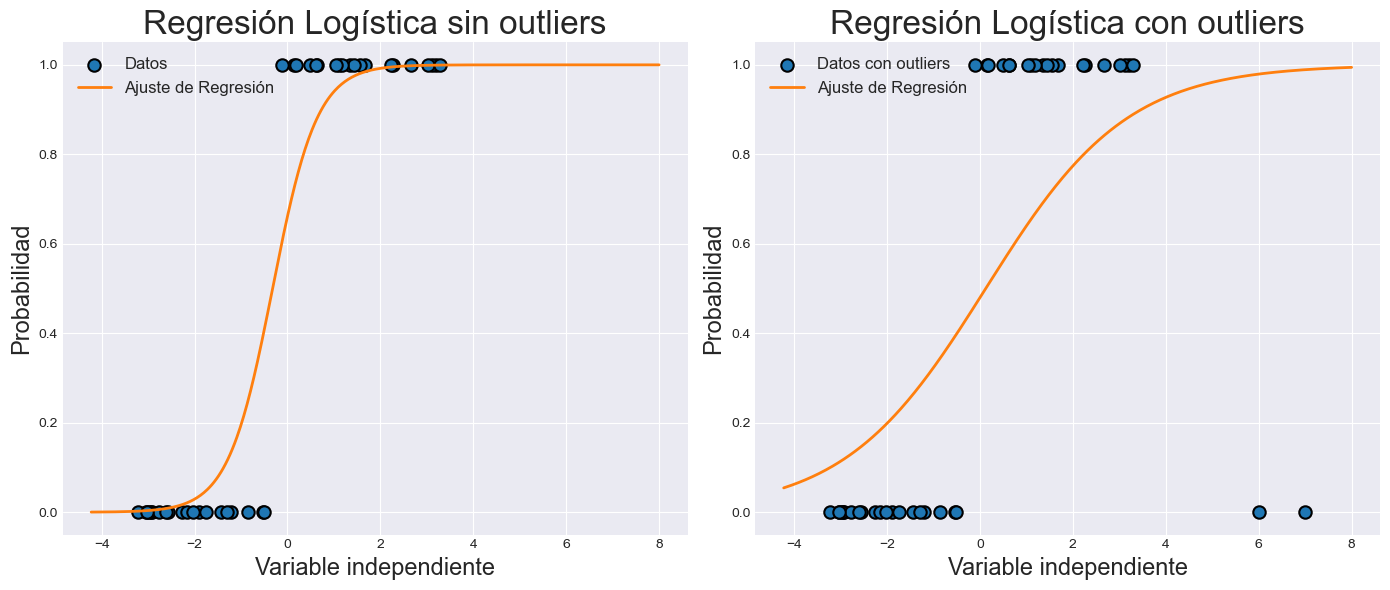

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

np.random.seed(41)

# Generamos un conjunto de datos de ejemplo
# Generamos 25 observaciones N(-1, 1) asociadas al valor 1
n_obs = 20

X1 = np.random.normal(loc=-2, scale=1, size=n_obs).reshape(-1, 1)
y1 = np.zeros(n_obs)

# Generamos 25 observaciones N(0, 1) asociadas al valor 0
X2 = np.random.normal(loc=2, scale=1, size=n_obs).reshape(-1, 1)
y2 = np.ones(n_obs)

# Combinamos todos los datos en un solo conjunto
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

# Creamos algunos outliers menos extremos
X_outlier = np.append(X, [[7], [6]], axis=0)
y_outlier = np.append(y, [0, 0])

# Ajustamos la regresión logística sin outliers
model = LogisticRegression()
model.fit(X, y)

# Ajustamos la regresión logística con outliers
model_outlier = LogisticRegression()
model_outlier.fit(X_outlier, y_outlier)

# Calculamos las precisiones
y_pred_train = model.predict(X)
accuracy_train = accuracy_score(y, y_pred_train)

y_pred_train_outlier = model_outlier.predict(X_outlier)
accuracy_train_outlier = accuracy_score(y_outlier, y_pred_train_outlier)

# Generamos un rango de valores para la gráfica
x_range = np.linspace(X.min() - 1, X_outlier.max() + 1, 500).reshape(-1, 1)

# Predecimos las probabilidades
y_pred_prob = model.predict_proba(x_range)[:, 1]
y_pred_prob_outlier = model_outlier.predict_proba(x_range)[:, 1]

# Ajustes de estilo
plt.style.use('seaborn-darkgrid')
colors = ['#1f77b4', '#ff7f0e']
scatter_kwargs = {'s': 80, 'edgecolor': 'k', 'linewidth': 1.5}
line_kwargs = {'linewidth': 2}

# Graficamos los resultados
plt.figure(figsize=(14, 6))

# Subgráfico sin outliers
plt.subplot(1, 2, 1)
plt.scatter(X, y, color=colors[0], label='Datos', **scatter_kwargs)
plt.plot(x_range, y_pred_prob, color=colors[1], label='Ajuste de Regresión', **line_kwargs)
plt.title(f'Regresión Logística sin outliers', fontsize=24)
plt.xlabel('Variable independiente', fontsize=17)
plt.ylabel('Probabilidad', fontsize=17)
plt.legend(fontsize=12)

# Subgráfico con outliers
plt.subplot(1, 2, 2)
plt.scatter(X_outlier, y_outlier, color=colors[0], label='Datos con outliers', **scatter_kwargs)
plt.plot(x_range, y_pred_prob_outlier, color=colors[1], label='Ajuste de Regresión', **line_kwargs)
plt.title(f'Regresión Logística con outliers', fontsize=24)
plt.xlabel('Variable independiente', fontsize=17)
plt.ylabel('Probabilidad', fontsize=17)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [2]:
model.coef_

array([[2.08589658]])

In [3]:
model.intercept_

array([0.67037173])

C:\Users\jprub\AppData\Local\Temp\ipykernel_22320\1521590114.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


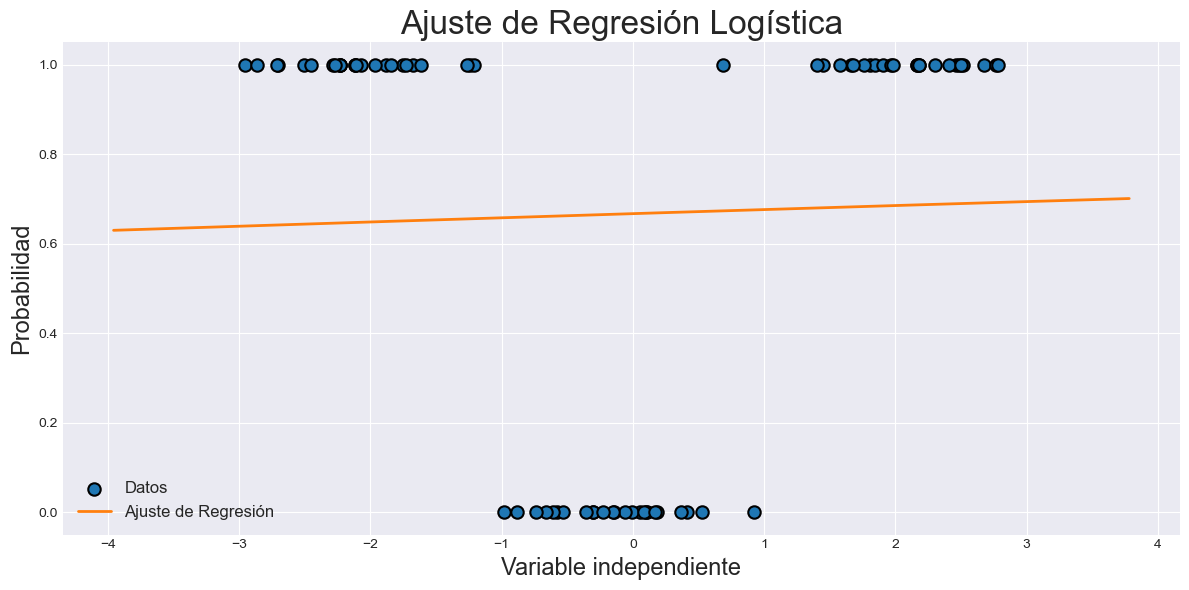

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Establecemos la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Generamos 25 observaciones N(-1, 1) asociadas al valor 1
X1 = np.random.normal(loc=-2, scale=0.5, size=25).reshape(-1, 1)
y1 = np.ones(25)

# Generamos 25 observaciones N(0, 1) asociadas al valor 0
X2 = np.random.normal(loc=0, scale=0.5, size=25).reshape(-1, 1)
y2 = np.zeros(25)

# Generamos 25 observaciones N(1, 1) asociadas al valor 1
X3 = np.random.normal(loc=2, scale=0.5, size=25).reshape(-1, 1)
y3 = np.ones(25)

# Combinamos todos los datos en un solo conjunto
X = np.concatenate((X1, X2, X3), axis=0)
y = np.concatenate((y1, y2, y3), axis=0)

# Ajustamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Predecimos las probabilidades
x_range = np.linspace(X.min() - 1, X.max() + 1, 300).reshape(-1, 1)
y_pred_prob = model.predict_proba(x_range)[:, 1]

# Calculamos la precisión del modelo
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

# Configuración de estilo y colores
plt.style.use('seaborn-darkgrid')
colors = ['#1f77b4', '#ff7f0e']

# Graficamos los resultados
plt.figure(figsize=(12, 6))

scatter_kwargs = {'s': 80, 'edgecolor': 'k', 'linewidth': 1.5}

# Scatter plot de los datos
plt.scatter(X, y, color=colors[0], label='Datos', **scatter_kwargs)


# Plot de la curva de ajuste del modelo
plt.plot(x_range, y_pred_prob, color=colors[1], linewidth=2, label='Ajuste de Regresión')

# Etiquetas y título
plt.title('Ajuste de Regresión Logística', fontsize=24)
plt.xlabel('Variable independiente', fontsize=17)
plt.ylabel('Probabilidad', fontsize=17)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


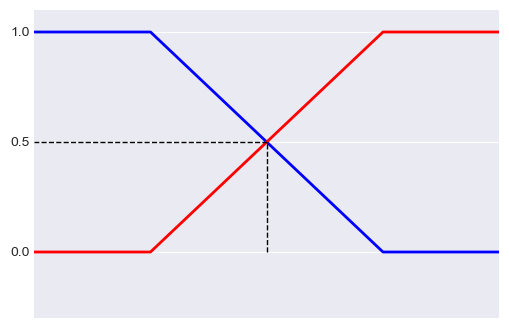

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points for the piecewise linear function
x1 = np.array([0, 1, 2, 3, 4])
y1 = np.array([1, 1, 0.5, 0, 0])

x2 = np.array([0, 1, 2, 3, 4])
y2 = np.array([0, 0, 0.5, 1, 1])

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x1, y1, 'b-', linewidth=2)
plt.plot(x2, y2, 'r-', linewidth=2)

# Add the dashed line from (2, 0) to (2, 0.5)
plt.plot([2, 2], [0, 0.5], 'k--', linewidth=1)
plt.plot([2, 0], [0.5, 0.5], 'k--', linewidth=1)

# Set the limits for the axes
plt.xlim(0, 4)
plt.ylim(-0.3, 1.1)

# Remove the words by setting empty labels
plt.xlabel('')
plt.ylabel('')

# Customize the ticks
plt.xticks([])
plt.yticks([0, 0.5, 1])

# Show the plot
plt.show()